In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier, plot_importance as xg_importance
from lightgbm import LGBMClassifier, plot_importance as lgb_importance
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [1]:
def metrics(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred, average='macro')
    print('정확도 : {0:.2f}, 정밀도 : {1:.2f}, 재현율 : {2:.2f}'.format(accuracy, precision, recall))
    print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1, roc_score))

In [4]:
data = pd.read_csv('../datas/credit card fraud/creditcard.csv')

In [5]:
data.shape

(284807, 31)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data.iloc[:, -1].value_counts()

0    284315
1       492
Name: Class, dtype: int64

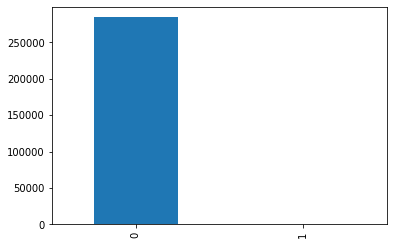

In [9]:
data.iloc[:, -1].value_counts().plot(kind='bar')

In [10]:
data.iloc[:, -1].value_counts() / data.iloc[:, -1].count() * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [11]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [14]:
print(y_train.value_counts() / y_train.count() * 100)
print(y_test.value_counts() / y_test.count() * 100)

0    99.826315
1     0.173685
Name: Class, dtype: float64
0    99.830061
1     0.169939
Name: Class, dtype: float64


In [16]:
def modeling(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    metrics(y_test, pred)

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
modeling(lr, X_train, X_test, y_train, y_test)

정확도 : 1.00, 정밀도 : 0.77, 재현율 : 0.53
f1-score : 0.63, auc : 0.76


In [21]:
lgb = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)
modeling(lgb, x_train = X_train, x_test = X_test, y_train = y_train, y_test = y_test)

정확도 : 1.00, 정밀도 : 0.95, 재현율 : 0.83
f1-score : 0.88, auc : 0.91
